# Voronoi-otsu-labeling

In [1]:
import numpy as np
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import timeit
import pyclesperanto_prototype as cle
import stackview

import pyclesperanto as pcle
cle.select_device("RTX")

C:\Users\haase\mambaforge\envs\tea4\lib\site-packages\napari_tools_menu\__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
C:\Users\haase\mambaforge\envs\tea4\lib\site-packages\napari_tools_menu\__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")


<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
pcle.select_device("RTX")

(OpenCL) NVIDIA GeForce RTX 3050 Ti Laptop GPU (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 20
	Global Memory Size: 4294 MB
	Maximum Object Size: 1073 MB

## Defining test data


StackViewNDArray([[[ 77, 214,  23, ...,  11, 117, 156],
                   [ 29, 137,  24, ...,  80, 137,  20],
                   [ 22, 220, 168, ..., 145, 136,  94],
                   ...,
                   [ 95,  18, 122, ...,  82,  98,  33],
                   [172,  11, 108, ..., 226,  55, 107],
                   [142, 220, 182, ..., 218,  31,  48]],

                  [[220, 147,   7, ..., 232, 233, 248],
                   [199,  19,  90, ..., 186,  84, 211],
                   [191, 167,  51, ..., 100, 220, 140],
                   ...,
                   [ 22, 236, 146, ..., 162, 129, 228],
                   [ 93,  87, 232, ...,  12, 144, 179],
                   [ 44, 199,  97, ..., 246,  63, 218]],

                  [[190, 118,  60, ..., 132,  27,  29],
                   [210,  81,  58, ..., 152,  72, 186],
                   [ 26, 194,  58, ..., 215,  92,  61],
                   ...,
                   [212, 193, 193, ..., 176,  44, 161],
                   [179,  66, 153, ...,  46, 180, 252],
                   [215,  67, 129, ..., 163, 239, 192]],

                  ...,

                  [[191,   0,  52, ..., 196, 164, 115],
                   [208, 181, 182, ...,  38, 207,  83],
                   [201,  84, 207, ...,  30, 130, 251],
                   ...,
                   [121, 253,  28, ...,  62, 219,  27],
                   [ 69, 116,  60, ..., 234, 171,  67],
                   [227, 119, 143, ..., 151, 248, 233]],

                  [[139, 221, 180, ...,  74,  15,  91],
                   [188, 155, 140, ..., 165, 246, 195],
                   [187, 192, 113, ..., 101, 213,  60],
                   ...,
                   [175, 168, 136, ...,  92, 190, 234],
                   [126, 244,  48, ..., 196, 220,  82],
                   [ 40, 179, 134, ..., 246,  56,  80]],

                  [[232, 107, 101, ..., 158,  59,   4],
                   [  6, 107, 186, ...,  57, 169,  24],
                   [114,  59, 108, ...,  48, 147, 222],
                   ...,
                   [ 64,   1,  10, ...,  73, 232, 245],
                   [240, 168,  40, ..., 237,  47,  89],
                   [227,  88,  69, ..., 189,  87,  83]]], dtype=uint8)
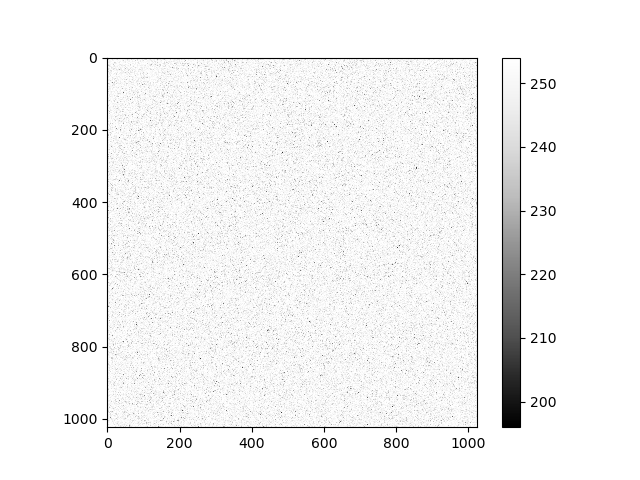
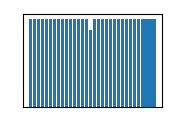

In [3]:
image = (np.random.random((50, 1024, 1024)) * 255).astype(np.uint8)

sigma_spot_detection = 1
sigma_outline = 1

stackview.insight(image)

In [4]:
cl_image = cle.push(image)
cl_labels = cle.create(image.shape, dtype=np.uint32)

In [5]:
pcl_image = pcle.push(image)
pcl_labels = pcle.create(image.shape, dtype=np.uint32)

In [6]:
%timeit cle.voronoi_otsu_labeling(cl_image, cl_labels, spot_sigma=sigma_spot_detection, outline_sigma=sigma_outline)

354 ms ± 3.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit pcle.voronoi_otsu_labeling(pcl_image, pcl_labels, spot_sigma=sigma_spot_detection, outline_sigma=sigma_outline)

387 ms ± 21.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
